<div style="text-align: center;">
  <img src="images/logo UniversiData_hor_black.png" alt="logo UniversiData_hor_black.png" style="max-width: 100%;">
</div>

<div style="border: 2px solid #000; border-radius: 8px; padding: 15px; background-color: #fff; color: #000;">

<center>
<font size=5> Welcome to the 2025 Hackathon! </font>
</center>

<center>
<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="GitHub" width="14"> Link to documentation and data: <a href="https://github.com/Universidata-srl/hackathon">github.com/Universidata-srl/hackathon</a>
</center>

#### <u>Overview</u> <a class="tocSkip">

In this Hackathon you will be required to estimate the **value** of a building with respect to the possibility of installing **solar panels** on it.

You will be given **satellite images**, and you will have to **detect** all buildings and then **predict** their value. 

#### <u>Objective</u> <a class="tocSkip">

Your technical objective is two-fold:

> `objective 1` : detect as many as possible **true** buildings in the <u>test</u> area

> `objective 2` : **correctly predict** the values of the detected buildings in the <u>test</u> area

#### <u>Winning criteria</u> <a class="tocSkip">

Your **score** will be evaluated as a _weighted average_ of the scores by a **technical** and a **business** panel:

$$ \text{final score} = 60\%~\text{technical score} + 40\%~\text{business score}$$

**Technical score [max: 1 point]**

The technical score relates to the **performance** of your code $-$ You can collect points in this way:

- `+0.3 points` : You detected more than **35% of the true buildings** in the test area
- `+0.3 points` : Your prediction model scores a **Mean Squared Error (MSE)** lower than 2.0 on the test area
- `+0.2 points` : You detected more **true buildings** than the other participants
- `+0.2 points` : Your prediction model scores a **better MSE** than the other participants

**Business score [max: 1 point]**

The business score relates to the **presentation** of your project $-$ Your presentation shall address:
- a brief explanation of the technical solution
- how can the analysis can be exploited in buisiness context

#### <u>Working groups</u> <a class="tocSkip">

You will work in **groups** (8/10 people), each group competeing for the victory as a whole.

- Each team shall be comprised by an equal amount of participants from the **begineer**, **intermediate**, and **advanced** classes
- Each team shall elect a **group leader**


</div>
<br>

In [ ]:
# Import hackathon data
import os

# check if data directory exists
if not os.path.exists("/content/data"):
    print("data dir not found, cloning repo...")
    !git clone https://github.com/gitpeblo/hackathon.git
    !mv hackathon/data .
    !mv hackathon/images .    
    !rm -rf hackathon
    !rm -rf sample_data
else:
    print("data directory already exists")

# Let's look at the data

The data is obtained from a satelite image from a section of the city of **Boston**:

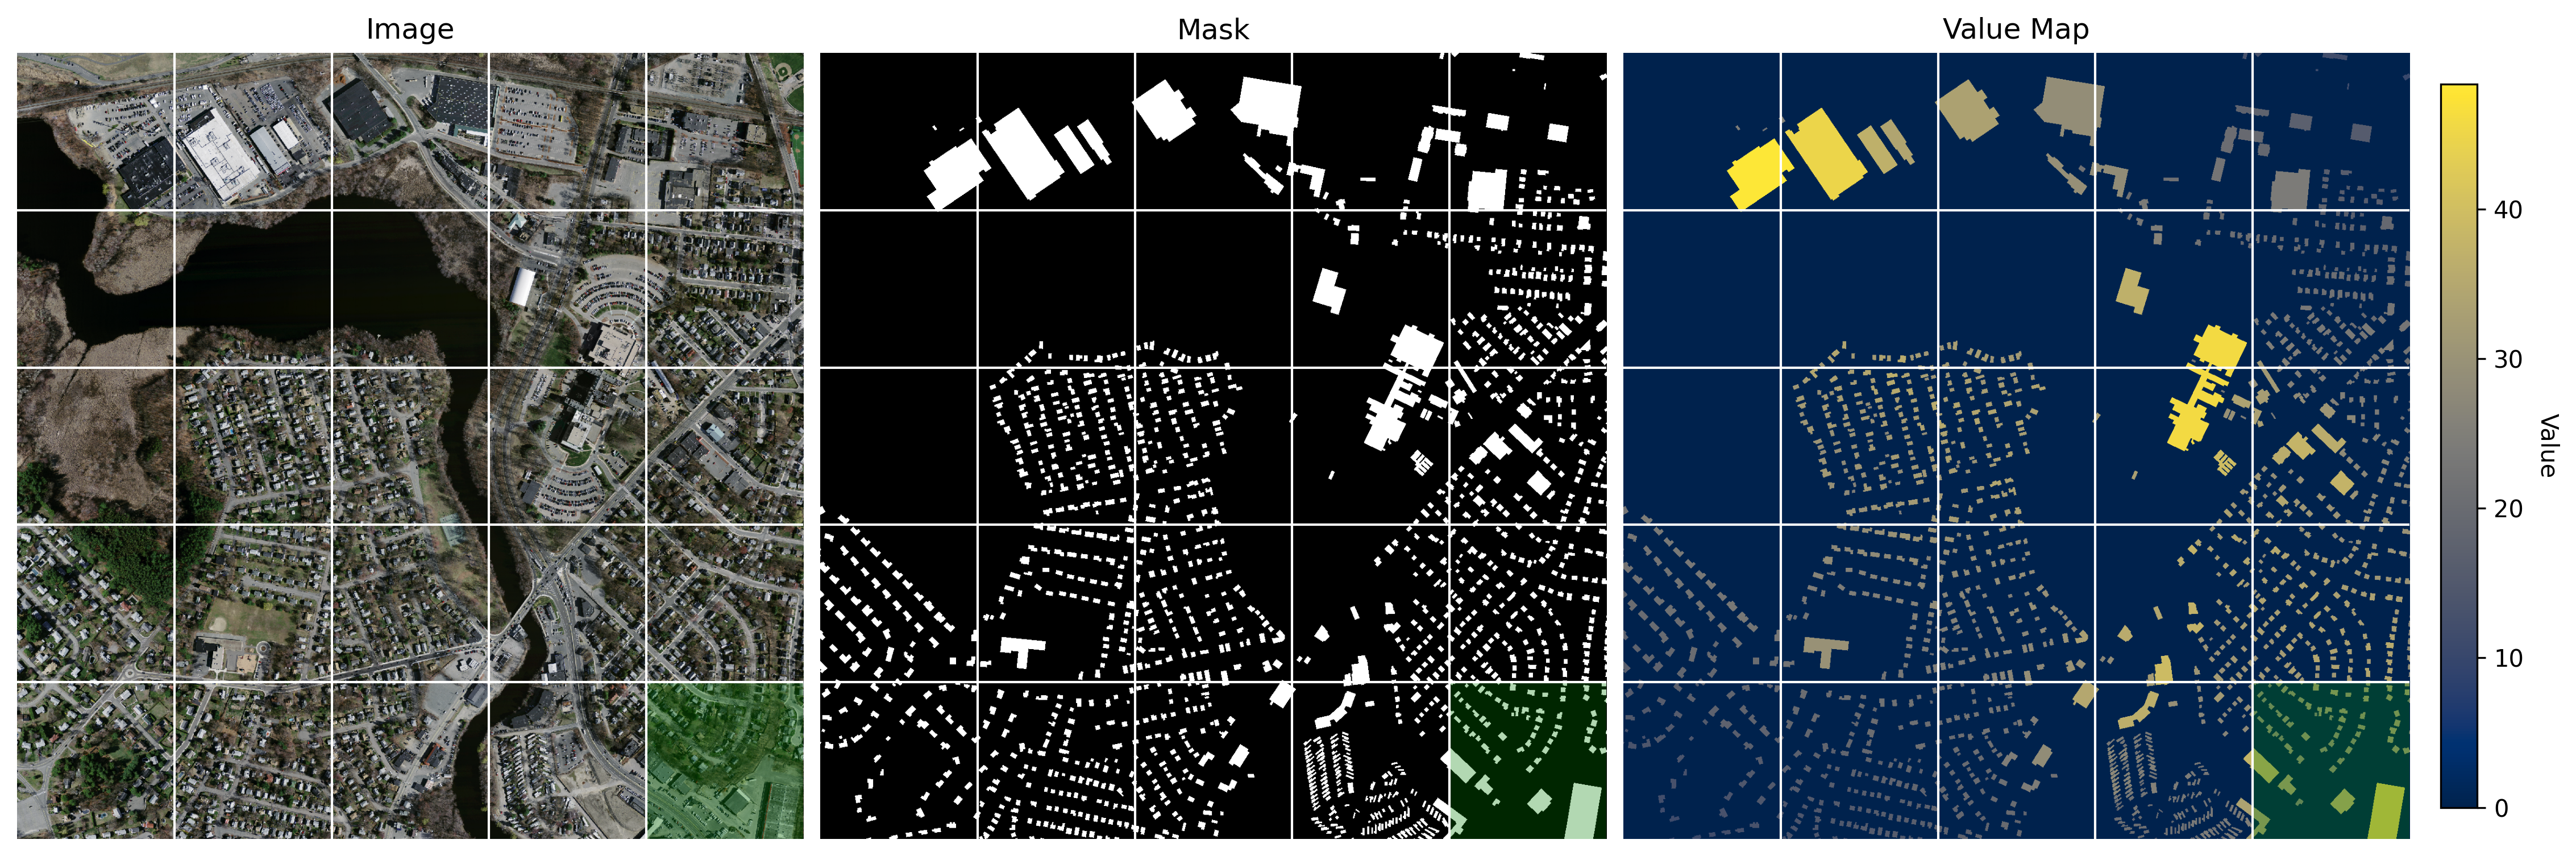

In [2]:
from IPython.display import Image
Image(filename="images/image_mask_map.png")

## What are these data?

- _Left_ $-$ The satelite **image**
- _Center_ $-$ The **mask** showing the ground-truth location of all the buildings
- _Right_ $-$ The **value map**, showing how important is each building for the installation of solar panels

As you can see, we segmented these images on a grid of $5 \times 5 = 25$ splits: we will call them "**samples**".

- The first 24 samples will constitute your **training data**
- The last 1 sample will constitute your **test data** (_highlighted in green_)

Let's **load all samples** and look at a few of them:

5 examples [out of 24] of training areas/masks/maps:


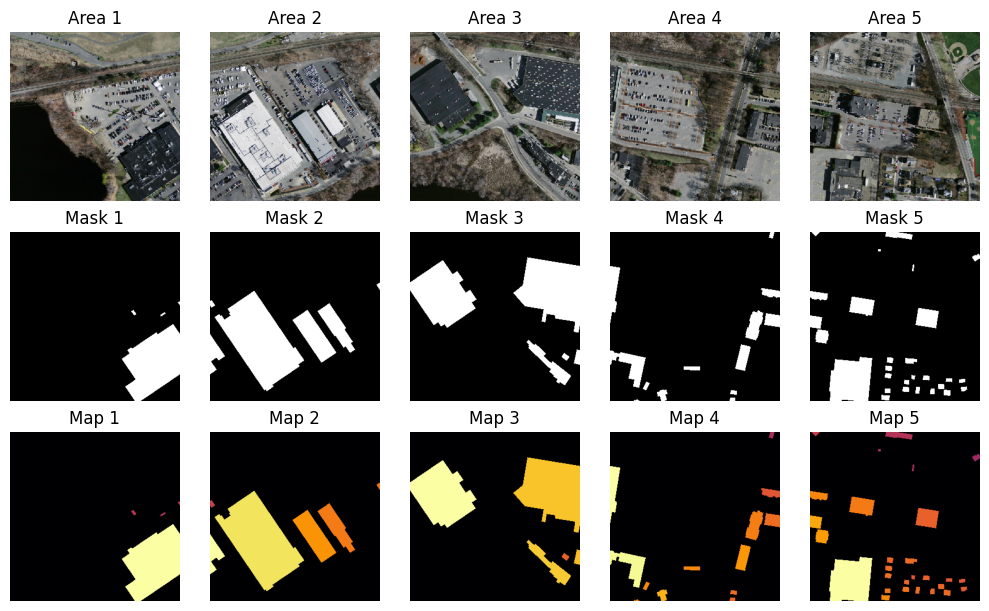



Dataframe of ground truth patches: each row is a patch in any of the images


image_ID  patch_ID  centroid_x  centroid_y  patch_area  \
0            0         1  269.333333  146.466667        30.0   
1            0         2  217.953488  143.604651        43.0   
2            0         3  298.133333  126.600000        15.0   
3            0         4  253.434126  232.372484      8744.0   
4            1         1    3.054054  128.459459        74.0   
...        ...       ...         ...         ...         ...   
1359        23       137  295.182796  294.698925        93.0   
1360        23       138    1.982456   15.649123        57.0   
1361        23       139   83.828341   57.513249      1736.0   
1362        23       140  293.501425  147.059829       351.0   
1363        23       141  129.060976    2.134146       164.0   

                      bbox      value  
0     (143, 265, 151, 275)  22.932174  
1     (139, 214, 149, 223)  24.711937  
2     (124, 296, 131, 300)  26.183018  
3     (164, 197, 300, 300)  48.327791  
4         (122, 0, 135, 9)  26.183018  
...                    ...        ...  
1359  (286, 288, 300, 300)  33.782497  
1360        (10, 0, 24, 7)  35.016672  
1361     (18, 43, 91, 121)  36.517404  
1362  (129, 282, 167, 300)  38.099080  
1363      (0, 115, 7, 149)  39.443048  

[1364 rows x 7 columns]



Test image on which to infer the patch values:


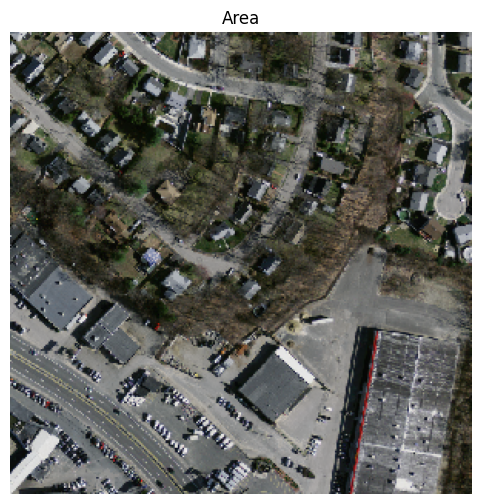

In [3]:
import pickle
from matplotlib import pyplot as plt

# === Load the bundle ===
with open("data/bundle_participants.pkl", "rb") as f:
    bundle_participants = pickle.load(f)

# Train set
X_train_areas = bundle_participants["X_train_areas"]
X_train_msks  = bundle_participants["X_train_msks"]
X_train_maps  = bundle_participants["X_train_maps"]
df_train      = bundle_participants["df_train"]

# Test set
X_test_area = bundle_participants["X_test_area"]


# === Display 5 examples of training areas / masks / maps ===

print(f'5 examples [out of {len(X_train_areas)}] of training areas/masks/maps:')

fig, axes = plt.subplots(3, 5, figsize=(10, 6), constrained_layout=True)

# --- first 5 areas ---
for i in range(5):
    axes[0, i].imshow(X_train_areas[i])
    axes[0, i].set_title(f"Area {i+1}")
    axes[0, i].axis("off")
    axes[0, i].set_aspect("equal")

# --- first 5 masks ---
for i in range(5):
    axes[1, i].imshow(X_train_msks[i], cmap="gray")
    axes[1, i].set_title(f"Mask {i+1}")
    axes[1, i].axis("off")
    axes[1, i].set_aspect("equal")

# --- first 5 maps ---
for i in range(5):
    axes[2, i].imshow(X_train_maps[i], cmap="inferno")
    axes[2, i].set_title(f"Map {i+1}")
    axes[2, i].axis("off")
    axes[2, i].set_aspect("equal")

plt.show()

# === Show dataframe of ground truth segments ===
print('\n\nDataframe of ground truth patches: each row is a patch in any of the images')
display(df_train)


# === Test image on which to infer the patch values ===
print('\n\nTest image on which to infer the patch values:')
fig = plt.figure(figsize=(6, 6))

plt.title(f"Area")
plt.imshow(X_test_area)
plt.axis("off")
plt.show()

## What do you receive?

The code above has **already** loaded the following variables:

```python
    X_train_areas = bundle_participants["X_train_areas"]
    X_train_msks  = bundle_participants["X_train_msks"]
    X_train_maps  = bundle_participants["X_train_maps"]
    df_train      = bundle_participants["df_train"]
```

```python
    X_test_area = bundle_participants["X_test_area"]
```

**Train:**
- `X_train_areas` : list containing the 24 area images
- `X_train_msks` : list containing the 24 pixel masks [0 or 1]
- `X_train_maps` : list containing the 24 value maps [each building has a different value]
- `df_train`: dataframe containing the **true** building values for each building patch of pixels

| Column         | Description                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| `image_ID`     | Index of the sample image from which the patch was extracted (0–23).                          |
| `patch_ID`     | Identifier of the building patch within that image.                                           |
| `centroid_x`   | X-coordinate of the patch centroid.                                                           |
| `centroid_y`   | Y-coordinate of the patch centroid.                                                           |
| `patch_area`   | Number of pixels belonging to the patch.                                                      |
| `bbox`         | Bounding box of the patch in the format `(ymin, xmin, ymax, xmax)`.                           |
| `value`        | Value associated with the building.                                                           |

**Test:**
- `X_test_area` : test area image


<div style="border-left: 5px solid #FFA500; background-color: rgba(255, 165, 0, 0.15); padding: 10px; border-radius: 4px; color: inherit;">

## Task

You will have to complete the following tasks.
<br><br>

#### Task 1 $-$ Building segmentation
> [ intermediate/advanced participants ]

Use computer vision to detect and characterize all the buildings.

1. Use **SAM** (**Segment Anything Model**) to find all the buildings in the images<br>
   &emsp;&emsp;(_You may post process the segmentation to remove false detections if needed_)
   
2. For each patch, **associate** a corresponding `value` from the training value maps<br>
   &emsp;&emsp;(_e.g., you can use the value of the closest true building_)

3. **Create a dataframe** `df_segmentations`, with the same columns as `df_train`, but:

   - replace the entries with the results you obtained from **steps 1.** and **2.**
   - include new rows for the patches in the **test set**

| image_ID | patch_ID | centroid_x | centroid_y | patch_area | bbox                     | value |
|----------|----------|------------|------------|------------|---------------------------|-------|
| …        | …        | …          | …          | …          | (…, …, …, …)              | …     |
| …        | …        | …          | …          | …          | (…, …, …, …)              | …     |

**Important:** This dataframe shall also contain the data for the **test** image $-$ For those, you shall set the `value` to 0 since this is unknown for the test.
<br><br>

#### Task 2 $-$ Regression
>  [ beginner/intermediate participants ]

Train a regression model on `df_segmentations`, that uses any sub-set of the columns to predict column `value`.

**Hint:** You will receive `df_segmentations` from Task 1, but, until your team mates are done, you can use `df_train`, since it has exactly the same structure.<br>
&emsp;&emsp; Just remember to drop any row pertaining to the test set!
</div>
<br>

<div style="border: 2px solid #000; border-radius: 8px; padding: 15px; background-color: #fff; color: #000;">

## Evaluation

We will evaluate as follows:

**Task 1**: We will check how many bounding boxes match with the ground truth, for the test image.

**Task 2**: We will apply your trained model to the dataframe, and evaluate the MSE.

## Expected outputs

> Send you results to $\texttt{amministrazione@universidata.it}$ with subject ''<span style="color: #267599;">Hacathon 2025 - \<group_name\></span>''

💾 **your code**

- Notebooks/files $-$ this is for us to check your logic

💾 **image**

- An image showing the **overlay** or **mask** of all segmentations detected on the test image, named "$\texttt{segmentations.png}$"

💾 **dataset**

- The dataset `df_segmentations` shall be sent as a $\texttt{.csv}$ file named "**$\texttt{df}$_$\texttt{segmentations.csv}$**"
- It shall have exactly and only the columns mentioned above

💾 **trained model**

- The trained model shall be sent to us as a `joblib` file named "**$\texttt{model.pkl}$**"

    <span style="color: #00aa00; font-weight: bold;">import</span> joblib<br>
    joblib.<span style="color: #267599;">dump</span>(model, <span style="color: #cc0000;">"model.pkl"</span>)

- **Write us which features** of `df_segmentation` you used, e.g.:

    [<span style="color: #cc0000;">"patch_ID"</span>, <span style="color: #cc0000;">"centroid_x"</span>, <span style="color: #cc0000;">"patch_area"</span>]
    
  We will extract the features from a test dataframe with the same columns as `df_segmentation` $\rightarrow$  you need to make sure that we can just run:
     
    X_test = df_test[[<span style="color: #cc0000;">"patch_ID"</span>, <span style="color: #cc0000;">"centroid_x"</span>, <span style="color: #cc0000;">"patch_area"</span>]]<br>
    model.<span style="color: #267599;">predict</span>(X_test)

</div>
<br>

<div class="alert alert-danger" role="alert" style="border-radius: 8px; padding: 10px;">
    
⚠️ **Warning** ⚠️ 

For the evaluation to happen, it is <u>**fundamental**</u> that you pass us your results in the correct format.

We will <u>not</u> be able to debug your code! $\rightarrow$ Make sure you comply to these formats!

</div>

In [ ]:
'''
This block installs the necessary packages for SAM (Segment Anything Model)
But, feel free to use any other segmentation model you would like!
''';
import importlib
import subprocess
import sys

def ensure(module, pip_name=None):
    try:
        importlib.import_module(module)
        print(f"{module} already installed")
    except ImportError:
        print(f"{module} missing, installing...")
        if pip_name is None:
            pip_name = module
        subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name])

# Check and install basic packages - torch first
ensure("torch")
ensure("torchvision")
ensure("cv2", "opencv-python")

# Check and install SAM
try:
    import segment_anything
    print("segment-anything already installed")
except ImportError:
    print("segment-anything missing, installing...")
    !pip install git+https://github.com/facebookresearch/segment-anything.git

In [5]:
# good luck, have fun coding!

In [ ]:
#EOF

In [ ]:
#EOF